# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The distribution is skewed and thus, is not a normal distribution.

The mean medical charge is: 13270.422265
The standard deviation of the medical charge is: 12110.011237


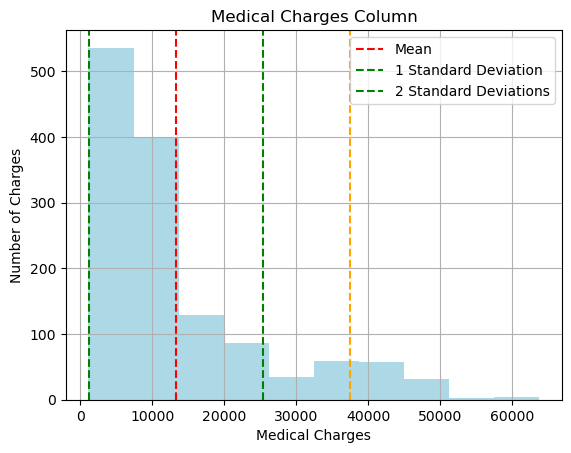

In [5]:
_ = medical.hist(column='charges', color='lightblue')
_ = plt.xlabel('Medical Charges')
_ = plt.ylabel('Number of Charges')
_ = plt.title('Medical Charges Column')

mean = round(np.mean(medical['charges']), 6)
sd = round(np.std(medical['charges'], ddof=1), 6)
print('The mean medical charge is:', mean)
print('The standard deviation of the medical charge is:', sd)

_ = plt.axvline(mean, color='r', linestyle='--')
_ = plt.axvline(mean + sd, color='g', linestyle='--')
_ = plt.axvline(mean - sd, color='g', linestyle='--')
_ = plt.axvline(mean + 2*sd, color='orange', linestyle='--')
_ = plt.legend(['Mean', '1 Standard Deviation', '2 Standard Deviations'])

In [6]:
medical['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ With Central Limit Theorem and the population in mind, we can use a t-test to answer the question.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ We should use a one-sided interval since the focus is on values below 12,000.

In [7]:
# Calculate the critical value 
n = len(medical['charges'])
critical_value = round(t.ppf(0.95, n-1), 6)
print('The critical value is:', critical_value )

The critical value is: 1.645994


In [8]:
# Calculate the 95% confidence interval
margin_of_error = critical_value * (sd / np.sqrt(n))

lower_confidence_interval = round((mean - margin_of_error), 6)
print('The lower confidence interval is:', lower_confidence_interval)

The lower confidence interval is: 12725.487222


We have 95% confidence that the lower limit of the mean is roughly 12,725.49.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis = The two groups are not charged different amounts.
       Alternative hypothesis = People with insurance are charged differently than those without it. Underlying assumption = no difference in charged amounts between the two groups.

__Q5:__ Perform this hypothesis test both manually, using the above formula, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [9]:
# Insured Manual approach

insured = medical['charges'].loc[medical['insuranceclaim']==1]
insured_size = len(insured)
insured_mean = round(np.mean(insured), 6)
insured_sd = round(np.std(insured), 6)
print('The mean insured charge is:', insured_mean)
print('The standard deviation of insured charges is:', insured_sd)

The mean insured charge is: 16423.928277
The standard deviation of insured charges is: 14036.95625


In [10]:
# Uninsured Manual approach
uninsured = medical['charges'].loc[medical['insuranceclaim']==0]
uninsured_size = len(uninsured)
uninsured_mean = round(np.mean(uninsured), 6)
uninsured_sd = round(np.std(uninsured), 6)
print('The mean uninsured mean charge is:', uninsured_mean)
print('The standard deviation of uninsured charges is:', uninsured_sd)

The mean uninsured mean charge is: 8821.421892
The standard deviation of uninsured charges is: 6440.699842


In [11]:
group_sd = round(np.sqrt(((insured_size - 1) * insured_sd**2 + (uninsured_size - 1) * uninsured_sd**2)
                   / ((insured_size + uninsured_size) - 2)), 6)
print('The group standard deviation of mean charges is:', group_sd)

t_stat = round((insured_mean - uninsured_mean) / (group_sd * np.sqrt( 1 / insured_size + 1 / uninsured_size)), 6)
print('The group t-score of mean charges is:', t_stat)

p_value = t.sf(t_stat, insured_size - 1 + uninsured_size - 1) * 2
print('The group p-value of mean charges is:', p_value)

The group standard deviation of mean charges is: 11512.282899
The group t-score of mean charges is: 11.901307
The group p-value of mean charges is: 4.090547712613224e-31


In [12]:
# scipy approach
from scipy.stats import ttest_ind

ttest_ind(insured, uninsured)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no equivalent z-test as it should not be used for samples.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test